In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

import typing_extensions
from sklearn.datasets import load_iris
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('force2020_data_unsupervised_learning.csv')
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [3]:
df.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [5]:
df = df[['DEPTH_MD', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
df.columns = ['DEPTH_MD', 'Bulk Density', 'Gamma Ray', 'Neutron Porosity', 'Photoelectric Factor', 'Sonic Transit Time']


In [6]:
df.dropna(inplace=True)
df

,DEPTH_MD,Bulk Density,Gamma Ray,Neutron Porosity,Photoelectric Factor,Sonic Transit Time
4238,1138.704,1.774626,55.892757,0.765867,1.631495,147.837677
4239,1138.856,1.800986,60.929138,0.800262,1.645080,142.382431
4240,1139.008,1.817696,62.117264,0.765957,1.645873,138.258331
4241,1139.160,1.829333,61.010860,0.702521,1.620216,139.198914
4242,1139.312,1.813854,58.501236,0.639708,1.504854,144.290085
...,...,...,...,...,...,...
16435,2993.256,2.468236,90.537521,0.341534,4.699200,86.474564
16436,2993.408,2.457519,88.819122,0.351085,4.699200,86.187599
16437,2993.560,2.429228,92.128922,0.364982,4.699200,87.797836
16438,2993.712,2.425479,95.870255,0.367323,5.224292,88.108452


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DEPTH_MD,12202.0,2066.272839,535.691815,1138.704000,1602.342000,2065.980000,2530.226000,2993.864000
Bulk Density,12202.0,2.149947,0.251592,1.493417,1.983767,2.059335,2.389839,2.889454
Gamma Ray,12202.0,61.253852,29.902708,6.191506,42.792794,62.886322,77.726776,499.022583
Neutron Porosity,12202.0,0.414572,0.139207,0.037976,0.313797,0.466891,0.513840,0.800262
Photoelectric Factor,12202.0,3.912313,1.816933,1.126667,2.629141,3.365132,4.686422,17.026619
Sonic Transit Time,12202.0,121.409905,30.394369,55.726753,89.977041,138.477173,146.242302,163.910797


# Data Preprocessing

In [8]:
numeric_columns = df.columns[1:]

In [9]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,DEPTH_MD,Bulk Density,Gamma Ray,Neutron Porosity,Photoelectric Factor,Sonic Transit Time
4238,1138.704,-1.491843,-0.179292,2.523654,-1.255364,0.869531
4239,1138.856,-1.387067,-0.010859,2.770744,-1.247886,0.690042
4240,1139.008,-1.320646,0.028875,2.524300,-1.247450,0.554350
4241,1139.160,-1.274390,-0.008126,2.068584,-1.261572,0.585297
4242,1139.312,-1.335919,-0.092056,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...
16435,2993.256,1.265151,0.979338,-0.524699,0.433103,-1.149449
16436,2993.408,1.222550,0.921870,-0.456081,0.433103,-1.158891
16437,2993.560,1.110101,1.032560,-0.356250,0.433103,-1.105910
16438,2993.712,1.095199,1.157682,-0.339430,0.722114,-1.095690


In [10]:
df1 = pd.read_csv('force2020_data_unsupervised_learning.csv')
df1.dropna(inplace=True)
Df = df1.merge(df,on='DEPTH_MD',how='left')


In [11]:
Df = Df[['DEPTH_MD','RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'Bulk Density', 
         'Gamma Ray', 'Neutron Porosity', 'Photoelectric Factor',
         'Sonic Transit Time']]
Df

,DEPTH_MD,RHOB,GR,NPHI,PEF,DTC,Bulk Density,Gamma Ray,Neutron Porosity,Photoelectric Factor,Sonic Transit Time
0,1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531
1,1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042
2,1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350
3,1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297
4,1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...,...,...,...,...,...
12197,2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449
12198,2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891
12199,2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910
12200,2993.712,2.425479,95.870255,0.367323,5.224292,88.108452,1.095199,1.157682,-0.339430,0.722114,-1.095690


# Elbow Method for Identify Optimal Cluster K

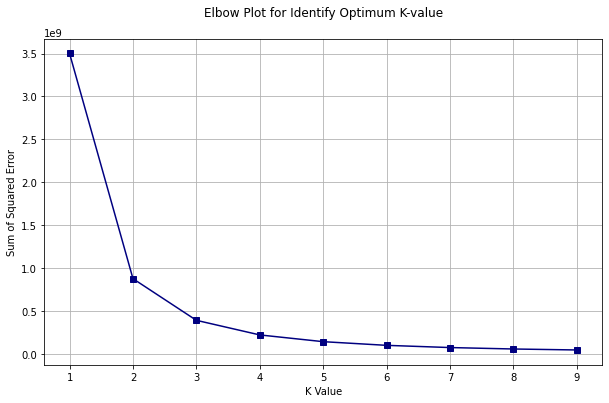

In [12]:
mean = []
sum_squared_error = []

K_range = range(1,10)

for k in K_range:
    kmean = KMeans(n_clusters = k)
    kmean.fit(df)
    mean.append(k)
    sum_squared_error.append(kmean.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range,sum_squared_error, marker='s', color='navy')
plt.title("Elbow Plot for Identify Optimum K-value",y=1.05)
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Error")
plt.grid(True) 

In [13]:
sum_squared_error

[3501329766.740285,
 874622702.3738278,
 389065168.5935825,
 218712482.90943825,
 140098105.91228464,
 97250021.72806051,
 71505988.8459385,
 54739041.38699787,
 43274202.7381614]

# Applying K Mean Clustering

In [14]:
K_Mean = range(2,4)

for k in K_Mean:
    kmeans = KMeans(n_clusters=k)
    Df[f'KMean_{k}'] = kmeans.fit_predict(df[numeric_columns])


In [15]:
#Df.drop('KMean_2', axis=1, inplace=True)
Df

,DEPTH_MD,RHOB,GR,NPHI,PEF,DTC,Bulk Density,Gamma Ray,Neutron Porosity,Photoelectric Factor,Sonic Transit Time,KMean_2,KMean_3
0,1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,1,2
1,1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,1,2
2,1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,1,2
3,1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,1,2
4,1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12197,2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,0,0
12198,2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,0,0
12199,2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,0,0
12200,2993.712,2.425479,95.870255,0.367323,5.224292,88.108452,1.095199,1.157682,-0.339430,0.722114,-1.095690,0,0


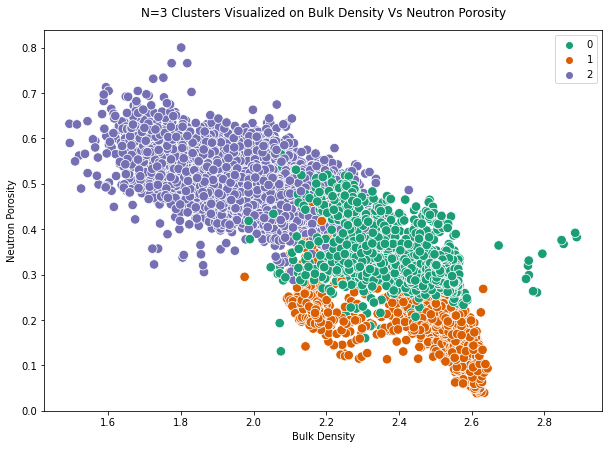

In [16]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=Df['RHOB'], y=Df['NPHI'], hue=Df['KMean_3'], palette='Dark2',s=90)
#plt.scatter(centroids[0],centroids[1],color='black',marker='*',label='centroid',s=200)
plt.title('N=3 Clusters Visualized on Bulk Density Vs Neutron Porosity',y=1.02)
plt.xlabel('Bulk Density')
plt.ylabel('Neutron Porosity')
plt.legend()
plt.show()

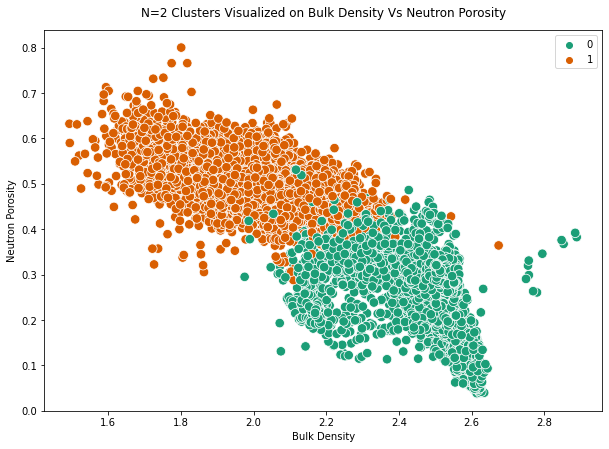

In [17]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=Df['RHOB'], y=Df['NPHI'], hue=Df['KMean_2'], palette='Dark2',s=90)
#plt.scatter(centroids[0],centroids[1],color='black',marker='*',label='centroid',s=200)
plt.title('N=2 Clusters Visualized on Bulk Density Vs Neutron Porosity',y=1.02)
plt.xlabel('Bulk Density')
plt.ylabel('Neutron Porosity')
plt.legend()
plt.show()

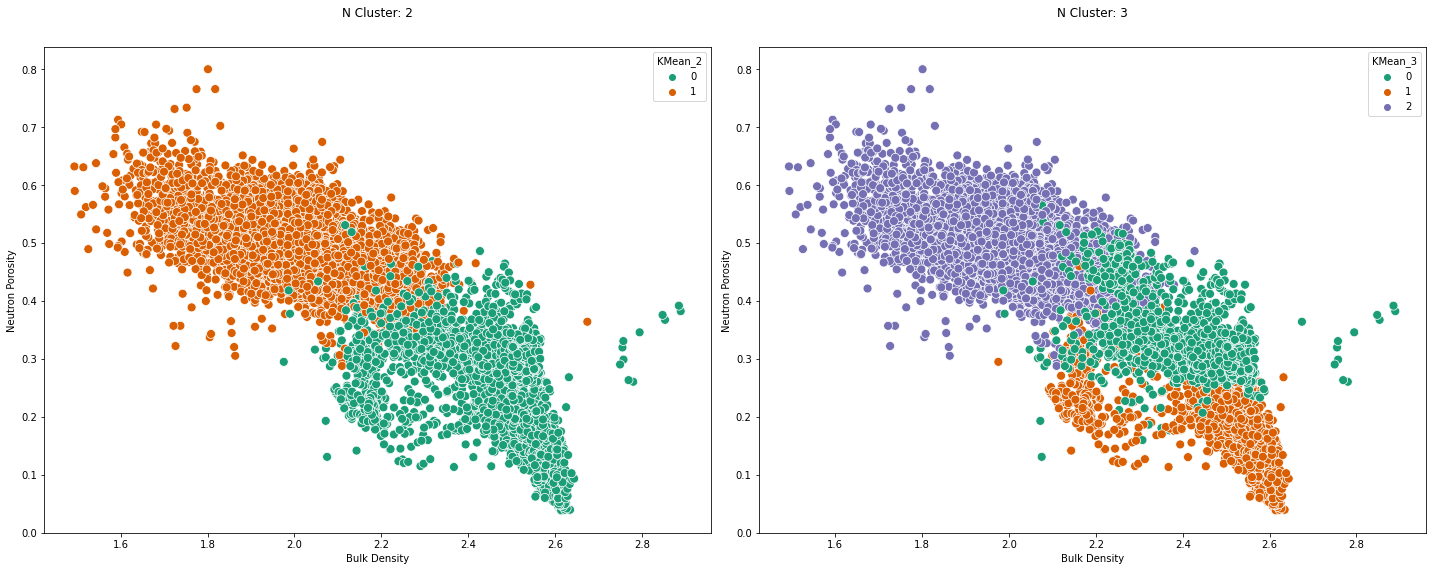

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (20,8))

for i,ax in enumerate(axes, start=2):
    sns.scatterplot(x=Df['RHOB'], y=Df['NPHI'], hue=Df[f'KMean_{i}'], palette='Dark2', s=80, ax=ax)
    ax.set_title(f"N Cluster: {i}", y =1.05)
    ax.set_xlabel('Bulk Density')
    ax.set_ylabel('Neutron Porosity')

plt.tight_layout()
plt.show()


In [19]:
# Numeric aggregation
numeric_analysis = Df.groupby('KMean_2', as_index=False)[Df.columns[:6]].mean()
numeric_analysis = numeric_analysis[['KMean_2', 'DEPTH_MD', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
numeric_analysis.round(2)

,KMean_2,DEPTH_MD,RHOB,GR,NPHI,PEF,DTC
0,0,2684.40,2.47,51.41,0.23,4.84,80.22
1,1,1783.06,2.00,65.77,0.50,3.49,140.28


In [20]:
# Numeric aggregation
numeric_analysis1 = Df.groupby('KMean_3', as_index=False)[Df.columns[:6]].mean()
numeric_analysis1 = numeric_analysis1[['KMean_3', 'DEPTH_MD', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
numeric_analysis1.round(2)

,KMean_3,DEPTH_MD,RHOB,GR,NPHI,PEF,DTC
0,0,2839.62,2.43,101.09,0.33,5.21,92.84
1,1,2569.89,2.48,23.62,0.18,4.68,73.72
2,2,1766.68,2.00,63.38,0.50,3.43,140.51
